In [1]:
import pandas as pd
import glob
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
import re


In [2]:
def import_folder(folder):
    filenames = glob.glob("data/" + folder + "/*.tsd")

    files = [file.split('\\')[1].split('.')[0] for file in filenames]

    signs = pd.DataFrame()
    for filename in files:
        df = pd.read_table('data/' + folder +'/' + filename + '.tsd', header=None)
        label = filename.split('-')[0]
        ID = filename.rsplit('-', 1)[1]
        df['label'] = label
        df['ID'] = int(ID)
        df.columns = ['x_L','y_L','z_L','roll_L','pitch_L','yaw_L','thumb_L','fore_L','middle_L','ring_L','little_L','x_R','y_R','z_R','roll_R','pitch_R','yaw_R','thumb_R','fore_R','middle_R','ring_R','little_R', 'label', 'ID']
        signs = signs.append(df)
        
    return signs

In [3]:
def temporal_scale(signs):
    IDs = signs['ID'].drop_duplicates().values
    labels = signs['label'].drop_duplicates().values
    signs_new = pd.DataFrame(columns = signs.columns)
    for ID in IDs:
        for sign in labels:

            df = signs[(signs['ID'] == ID) & (signs['label'] == sign)]

            df = df[['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R']]

            df_new = pd.DataFrame(index=np.arange(57), columns = df.columns)

            for column in df:    
                column_resample = np.fft.irfft(np.fft.rfft(df[column]), 57)
                df_new[column] = column_resample

            df_new['label'] = sign
            df_new['ID'] = ID
            df_new['folder'] = folder
            signs_new = signs_new.append(df_new)
            #original = signs_new[['x_L', 'y_L', 'z_L', 'x_R', 'y_R', 'z_R']]
            #scaled = (original - original.min())/(original.max() - original.min())
            #signs_new[['x_L', 'y_L', 'z_L', 'x_R', 'y_R', 'z_R']] = scaled
    return signs_new

In [4]:

root='data'
signs = pd.DataFrame()
signs_all = pd.DataFrame()
signs_all_ts = pd.DataFrame()
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
for folder in dirlist:
    print(folder)
    signs = import_folder(folder)
    signs_ts = temporal_scale(signs)
    signs_all = signs_all.append(signs)
    signs_all_ts = signs_all_ts.append(signs_ts)

tctodd1
tctodd2
tctodd3
tctodd4
tctodd5
tctodd6
tctodd7
tctodd8
tctodd9


ValueError: could not convert string to float: 'alive'

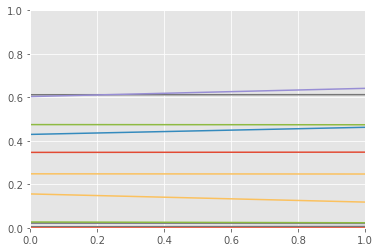

In [10]:
S = signs[(signs['ID'] == 1) & (signs['label'] == 'alive')]
plt.plot(np.arange(len(S)), S, '-')

In [5]:
def flatten(df):
    df2 = df
    df['frame'] = df.index + 1
    var = ['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R']
    df = df[['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R', 'label', 'frame']]
    df = df.pivot(columns = 'frame', index = 'label').reset_index()
    df.columns = [[str(e[0]) + str(e[1]) for e in df.columns.values.tolist()]]
    df['ID'] = df2['ID']
    df['folder'] = df2['folder']
    del df2
    return df

In [6]:
IDs = signs['ID'].drop_duplicates().values
labels = signs['label'].drop_duplicates().values

signs_flat = pd.DataFrame()
for folder in dirlist:
    for ID in IDs:
        for sign in labels:
            #print(ID, sign, folder)
            df = signs_all_ts[(signs_all_ts['ID'] == ID) & (signs_all_ts['label'] == sign) & (signs_all_ts['folder'] == folder)]
            signs_flat = signs_flat.append(flatten(df))

C:\Users\charu mulwani\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
X = signs_flat[signs_flat.columns[2:]]
del X['label']
Y = signs_flat['label']
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)



In [37]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
sum(y_pred == y_test)/len(y_test)

0.92487804878048785

In [45]:


report = classification_report(y_test, clf.predict(X_test))
report = re.sub(' +', ',', report )

line = report.split('\n')[0]
columns = ['class']
columns.extend(line.split(',')[1:])
class_report = pd.DataFrame(columns = columns)
#class_report = class_report.astype(float)
for line in report.split('\n')[2:95]:
    row = line.split(',')[1:]
    row = list(map(float,row))
    class_report = class_report.append(pd.Series(row, index=class_report.columns), ignore_index=True)

    
class_report['class_name'] = le.inverse_transform(class_report['class'].astype(int))

class_report.mean(axis = 0)

class        46.000000
precision     0.932688
recall        0.930215
f1-score      0.924086
support      10.806452
dtype: float64

NameError: name 'signs' is not defined

In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

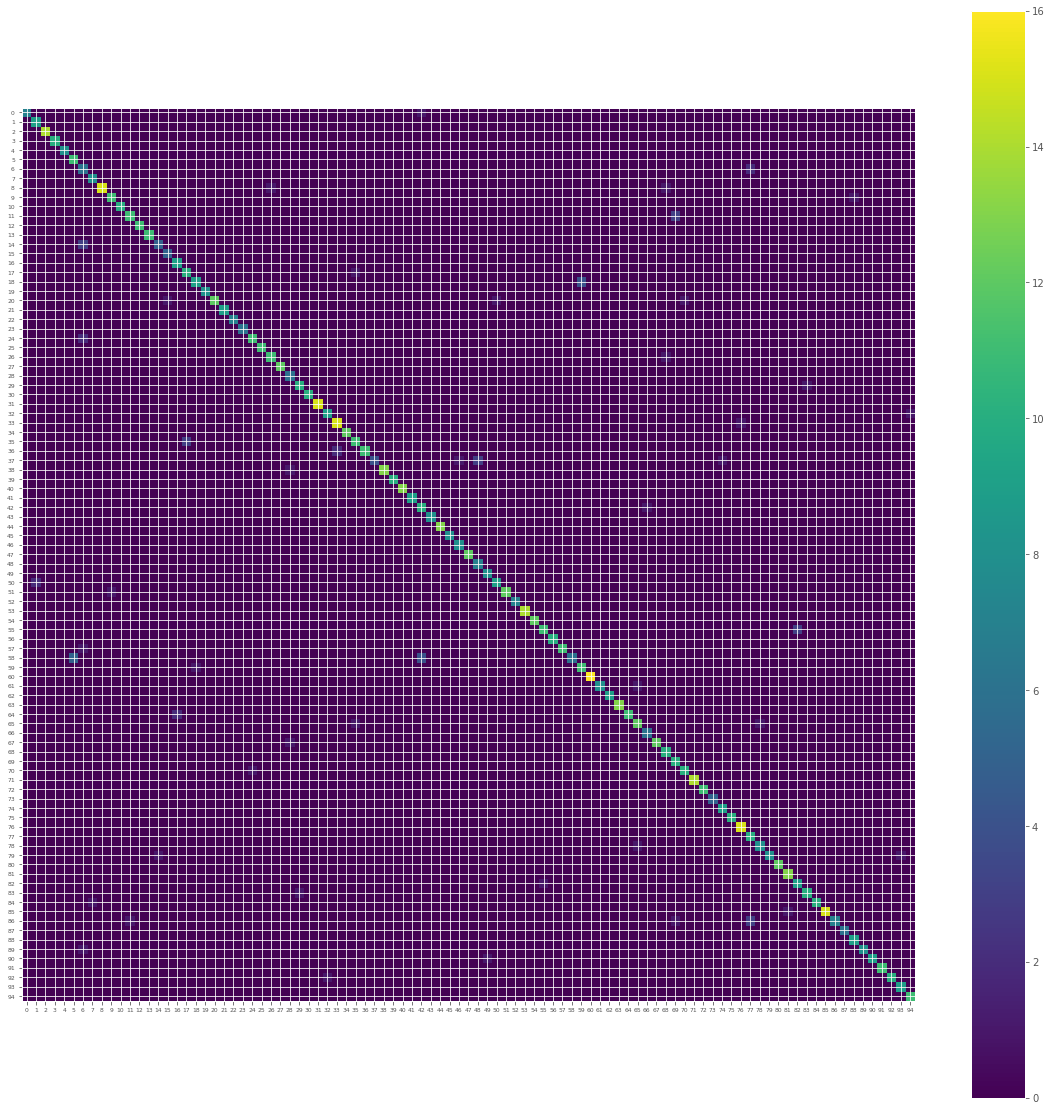

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
confmat=cnf_matrix
ticks=np.linspace(0, 94,num=95)
plt.imshow(confmat, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [20]:
sign_list = signs_flat.columns.values
sign_list
right_match = ['_R']
right_matching = [s for s in sign_list if any(xs in s for xs in right_match)]
left_matching = [s for s in sign_list if(s not in right_matching)]
left_signs_flat = signs_flat[left_matching]


In [21]:
X_left = left_signs_flat[left_signs_flat.columns[2:]]
del X_left['label']
Y_left = left_signs_flat['label']
le = LabelEncoder()
le.fit(Y_left)
Y_left = le.transform(Y_left)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_left, Y_left, test_size=0.40, random_state=42)

In [23]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
sum(y_pred == y_test)/len(y_test)

0.35414634146341462

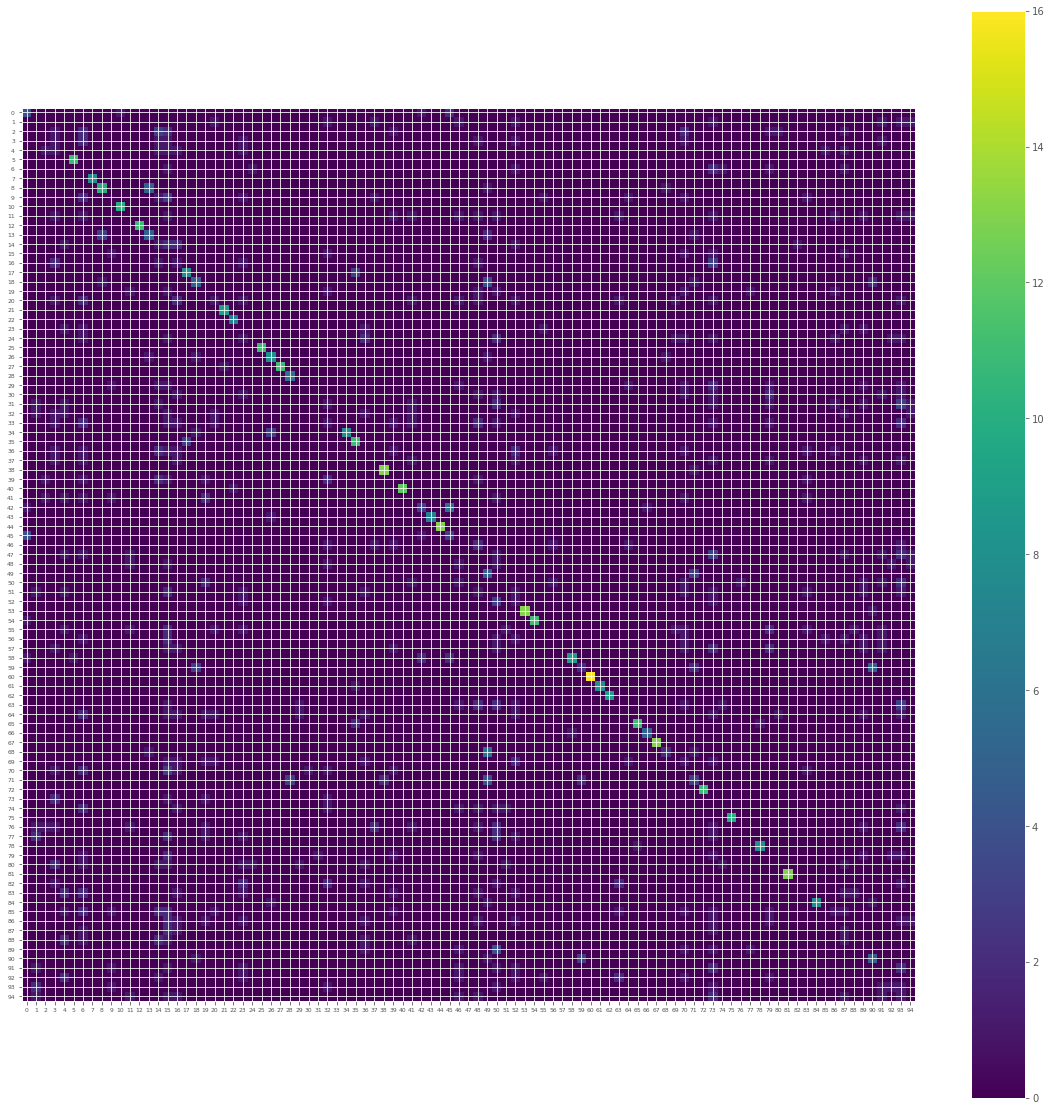

In [25]:
#Plotting Confusion Matrix for Left
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,20))
confmat=cnf_matrix
ticks=np.linspace(0, 94,num=95)
plt.imshow(confmat, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [29]:
sign_list = signs_flat.columns.values
sign_list
left_match = ['_L']
left_matching = [s for s in sign_list if any(xs in s for xs in left_match)]
right_matching = [s for s in sign_list if(s not in left_matching)]
right_signs_flat = signs_flat[right_matching]
X_right = right_signs_flat[right_signs_flat.columns[2:]]
del X_right['label']
Y_right = right_signs_flat['label']
le = LabelEncoder()
le.fit(Y_right)
Y_right = le.transform(Y_right)
right_signs_flat.columns.values

array(['ID', 'folder', 'fore_R1', 'fore_R10', 'fore_R11', 'fore_R12',
       'fore_R13', 'fore_R14', 'fore_R15', 'fore_R16', 'fore_R17',
       'fore_R18', 'fore_R19', 'fore_R2', 'fore_R20', 'fore_R21',
       'fore_R22', 'fore_R23', 'fore_R24', 'fore_R25', 'fore_R26',
       'fore_R27', 'fore_R28', 'fore_R29', 'fore_R3', 'fore_R30',
       'fore_R31', 'fore_R32', 'fore_R33', 'fore_R34', 'fore_R35',
       'fore_R36', 'fore_R37', 'fore_R38', 'fore_R39', 'fore_R4',
       'fore_R40', 'fore_R41', 'fore_R42', 'fore_R43', 'fore_R44',
       'fore_R45', 'fore_R46', 'fore_R47', 'fore_R48', 'fore_R49',
       'fore_R5', 'fore_R50', 'fore_R51', 'fore_R52', 'fore_R53',
       'fore_R54', 'fore_R55', 'fore_R56', 'fore_R57', 'fore_R6',
       'fore_R7', 'fore_R8', 'fore_R9', 'label', 'little_R1', 'little_R10',
       'little_R11', 'little_R12', 'little_R13', 'little_R14',
       'little_R15', 'little_R16', 'little_R17', 'little_R18',
       'little_R19', 'little_R2', 'little_R20', 'little_R21', '

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_right, Y_right, test_size=0.40, random_state=42)
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
y_pred = clf.fit(X_train, y_train).predict(X_test)
sum(y_pred == y_test)/len(y_test)

0.90146341463414636

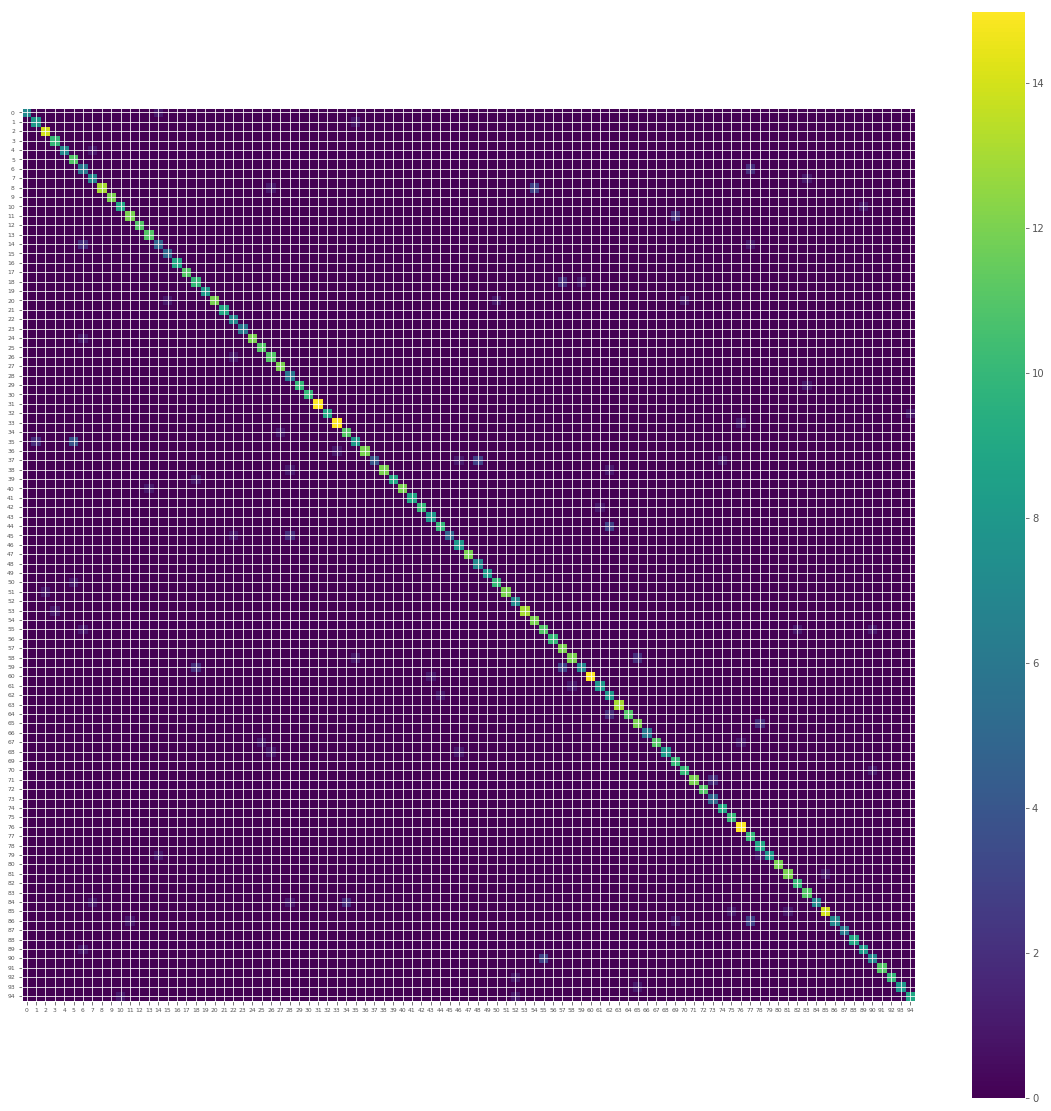

In [31]:
#Plotting Confusion Matrix for Right
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,20))
confmat=cnf_matrix
ticks=np.linspace(0, 94,num=95)
plt.imshow(confmat, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [99]:
report = classification_report(y_test, clf.predict(X_test))

In [100]:
report = re.sub(' +', ',', report )
report

',precision,recall,f1-score,support\n\n,0,1.00,0.88,0.93,8\n,1,0.80,0.89,0.84,9\n,2,0.93,1.00,0.97,14\n,3,0.91,1.00,0.95,10\n,4,1.00,0.88,0.93,8\n,5,0.69,1.00,0.81,11\n,6,0.55,0.75,0.63,8\n,7,0.78,0.88,0.82,8\n,8,1.00,0.76,0.87,17\n,9,1.00,1.00,1.00,12\n,10,0.90,0.90,0.90,10\n,11,0.92,0.86,0.89,14\n,12,1.00,1.00,1.00,11\n,13,0.92,1.00,0.96,11\n,14,0.71,0.62,0.67,8\n,15,0.83,1.00,0.91,5\n,16,1.00,1.00,1.00,9\n,17,1.00,1.00,1.00,11\n,18,0.77,0.77,0.77,13\n,19,1.00,1.00,1.00,8\n,20,1.00,0.80,0.89,15\n,21,1.00,1.00,1.00,9\n,22,0.78,1.00,0.88,7\n,23,1.00,1.00,1.00,6\n,24,1.00,0.92,0.96,13\n,25,0.92,1.00,0.96,11\n,26,0.85,0.92,0.88,12\n,27,0.92,1.00,0.96,12\n,28,0.60,1.00,0.75,6\n,29,1.00,0.91,0.95,11\n,30,1.00,1.00,1.00,10\n,31,1.00,1.00,1.00,15\n,32,1.00,0.90,0.95,10\n,33,0.94,0.94,0.94,16\n,34,0.85,0.92,0.88,12\n,35,0.80,0.57,0.67,14\n,36,1.00,0.92,0.96,13\n,37,1.00,0.44,0.62,9\n,38,1.00,0.86,0.92,14\n,39,1.00,0.90,0.95,10\n,40,1.00,0.92,0.96,13\n,41,1.00,1.00,1.00,9\n,42,1.00,0.91,0.95,1

In [101]:
line = report.split('\n')[0]

In [102]:
line

',precision,recall,f1-score,support'

In [103]:
columns = ['class']
columns.extend(line.split(',')[1:])

In [104]:
columns

['class', 'precision', 'recall', 'f1-score', 'support']

In [105]:
class_report = pd.DataFrame(columns = columns)

In [106]:
class_report

,class,precision,recall,f1-score,support


In [107]:
for line in report.split('\n')[2:95]:
    row = line.split(',')[1:]
    row = list(map(float,row))
    class_report = class_report.append(pd.Series(row, index=class_report.columns), ignore_index=True)

In [108]:
class_report['class_name'] = le.inverse_transform(class_report['class'].astype(int))

In [109]:
Y_left

array([ 3,  4,  5, ..., 92, 93, 94], dtype=int64)

In [110]:
pd.DataFrame(Y_left)

,0
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10
8,11
9,12


In [111]:
classes=le.inverse_transform(pd.DataFrame(Y_left)[0].astype(int)

SyntaxError: unexpected EOF while parsing (<ipython-input-111-307512868bcc>, line 1)

In [112]:
classes=le.inverse_transform(pd.DataFrame(Y_left)[0].astype(int))

In [113]:
classes

array(['alive', 'all', 'answer', ..., 'yes', 'you', 'zero'], dtype=object)

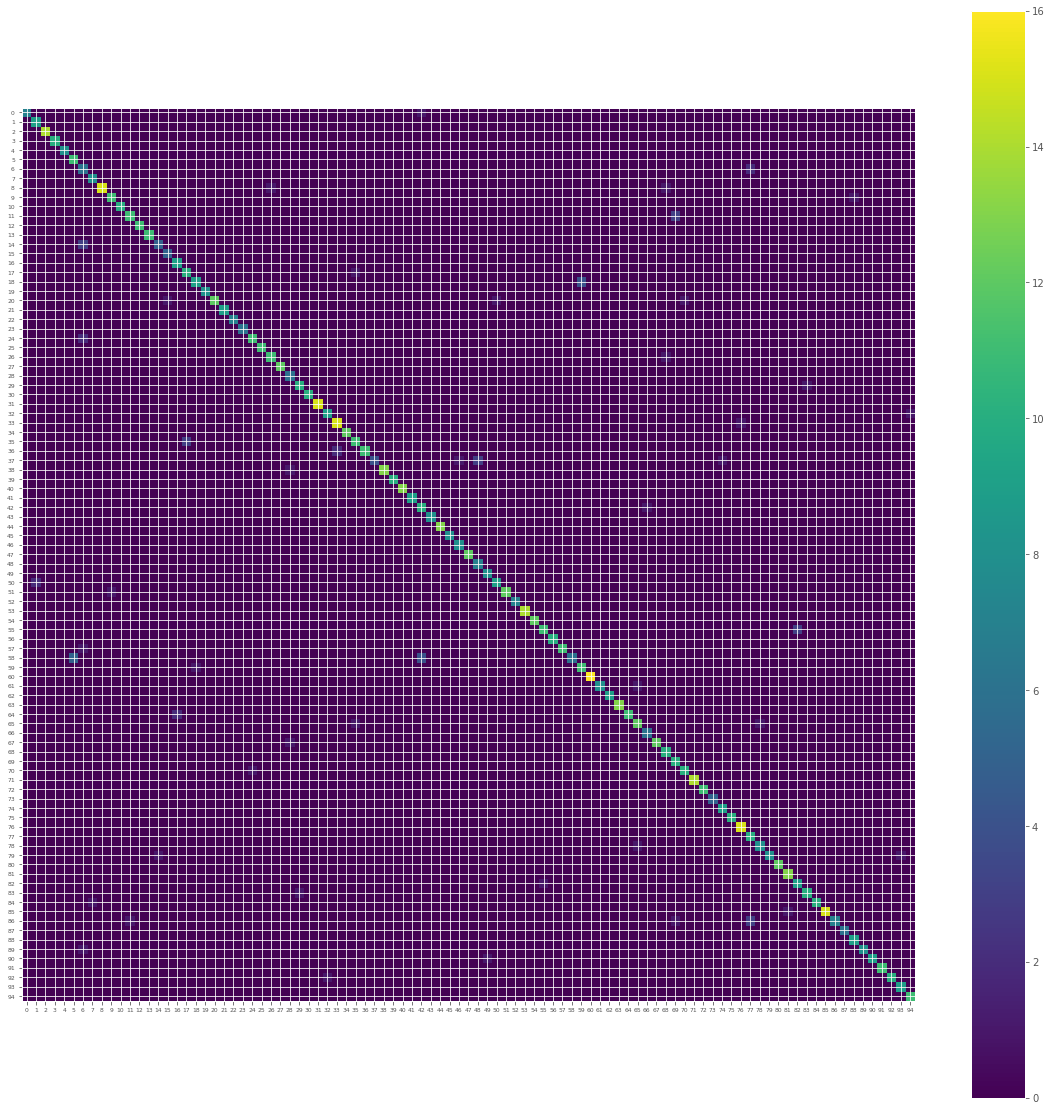

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
confmat=cnf_matrix
ticks=np.linspace(0, 94,num=95)
plt.imshow(confmat, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()